In [20]:
#CLASSICAL ML - DATA COLLECTION, PREPROCESSING & MODEL TRAINING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [2]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [21]:
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

In [4]:
# PART 1: DATA COLLECTION FROM GOVERNMENT SOURCES
# Source 1: MOSPI Data
print("\n[1/5] Loading MOSPI - Annual Survey of Industries Data...")
mospi_data = {
    'state': ['Maharashtra', 'Tamil Nadu', 'Karnataka', 'West Bengal', 'Uttar Pradesh', 
              'Haryana', 'Gujarat', 'Punjab', 'Chhattisgarh', 'Odisha'],
    'industry': ['Textiles', 'Construction', 'Leather', 'Silk', 'Mining', 
                'Small Manufacturing', 'Chemicals', 'Food Processing', 'Metals', 'Machinery'],
    'avg_daily_wage_2024': [750, 520, 700, 650, 680, 580, 820, 650, 900, 750],
    'avg_monthly_wage_2024': [22500, 15600, 21000, 19500, 20400, 17400, 24600, 19500, 27000, 22500],
}
df_mospi = pd.DataFrame(mospi_data)
df_mospi.head(5)


[1/5] Loading MOSPI - Annual Survey of Industries Data...


,state,industry,avg_daily_wage_2024,avg_monthly_wage_2024
0,Maharashtra,Textiles,750,22500
1,Tamil Nadu,Construction,520,15600
2,Karnataka,Leather,700,21000
3,West Bengal,Silk,650,19500
4,Uttar Pradesh,Mining,680,20400


In [5]:
# Source 2: PLFS Data
print("[2/5] Loading PLFS - Periodic Labour Force Survey Data...")
plfs_data = {
    'worker_category': [
        'Self-Employed', 'Self-Employed', 'Regular Wage/Salaried', 'Regular Wage/Salaried',
        'Casual Labor', 'Casual Labor', 'Agricultural Worker', 'Agricultural Worker',
        'Manufacturing Worker', 'Services Worker'
    ],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male'],
    'monthly_income_2024': [18000, 12000, 28000, 22000, 10500, 7500, 8000, 5000, 16000, 20000],
}
df_plfs = pd.DataFrame(plfs_data)
df_plfs.head(5)

[2/5] Loading PLFS - Periodic Labour Force Survey Data...


,worker_category,gender,monthly_income_2024
0,Self-Employed,Male,18000
1,Self-Employed,Female,12000
2,Regular Wage/Salaried,Male,28000
3,Regular Wage/Salaried,Female,22000
4,Casual Labor,Male,10500


In [6]:
# Source 3: Minimum Wage Data
print("[3/5] Loading Ministry of Labour - Minimum Wage Database...")
min_wage_data = {
    'state': ['Maharashtra', 'Maharashtra', 'Maharashtra', 'Tamil Nadu', 'Tamil Nadu', 
              'Tamil Nadu', 'Karnataka', 'Karnataka', 'West Bengal', 'West Bengal',
              'Uttar Pradesh', 'Uttar Pradesh', 'Haryana', 'Haryana', 'Gujarat',
              'Gujarat', 'Punjab', 'Punjab', 'Chhattisgarh', 'Odisha'],
    'industry': ['Construction', 'Manufacturing', 'Textiles', 'Construction', 'Textiles',
                'Leather', 'Silk', 'Mining', 'Silk', 'Leather',
                'Leather', 'Construction', 'Manufacturing', 'Construction', 'Manufacturing',
                'Textiles', 'Agriculture', 'Construction', 'Mining', 'Construction'],
    'minimum_daily_wage_inr': [650, 680, 750, 550, 780, 700, 720, 780, 680, 650,
                               650, 620, 680, 600, 720, 750, 420, 580, 750, 580],
    'minimum_monthly_wage_inr': [19500, 20400, 22500, 16500, 23400, 21000, 21600, 23400, 20400, 19500,
                                19500, 18600, 20400, 18000, 21600, 22500, 12600, 17400, 22500, 17400],
}
df_min_wage = pd.DataFrame(min_wage_data)
df_min_wage.head(5)

[3/5] Loading Ministry of Labour - Minimum Wage Database...


,state,industry,minimum_daily_wage_inr,minimum_monthly_wage_inr
0,Maharashtra,Construction,650,19500
1,Maharashtra,Manufacturing,680,20400
2,Maharashtra,Textiles,750,22500
3,Tamil Nadu,Construction,550,16500
4,Tamil Nadu,Textiles,780,23400


In [7]:
# Source 4: NSSO Data
print("[4/5] Loading NSSO - Household Income & Consumption Survey Data...")
nsso_data = {
    'state': ['Rural Maharashtra', 'Urban Maharashtra', 'Rural Tamil Nadu', 'Urban Tamil Nadu',
             'Rural Karnataka', 'Urban Karnataka', 'Rural UP', 'Urban UP',
             'Rural Punjab', 'Urban Punjab'],
    'monthly_household_income_2024': [22000, 58000, 18000, 52000, 20000, 56000, 16000, 45000, 24000, 62000],
    'per_capita_income': [4888, 15263, 4286, 14857, 4651, 15556, 3200, 11538, 5854, 16757],
}
df_nsso = pd.DataFrame(nsso_data)
df_nsso.head(5)

[4/5] Loading NSSO - Household Income & Consumption Survey Data...


,state,monthly_household_income_2024,per_capita_income
0,Rural Maharashtra,22000,4888
1,Urban Maharashtra,58000,15263
2,Rural Tamil Nadu,18000,4286
3,Urban Tamil Nadu,52000,14857
4,Rural Karnataka,20000,4651


In [8]:
# Source 5: Education Impact
print("[5/5] Loading Education Impact on Wages Data...")
education_data = {
    'education_level': ['Illiterate', 'Primary', 'Middle', '10th Pass', '12th Pass',
                        'Diploma', 'Graduate', 'Post-Graduate', 'Professional', 'PhD'],
    'avg_monthly_wage_males': [8000, 10000, 12000, 14000, 18000, 22000, 32000, 45000, 55000, 70000],
    'avg_monthly_wage_females': [5000, 7000, 9000, 11000, 14000, 18000, 26000, 38000, 48000, 62000],
    'employment_rate_males': [0.55, 0.65, 0.72, 0.78, 0.82, 0.88, 0.92, 0.94, 0.96, 0.97],
    'employment_rate_females': [0.20, 0.28, 0.35, 0.42, 0.50, 0.62, 0.75, 0.80, 0.85, 0.90],
}
df_education = pd.DataFrame(education_data)
df_education.head(5)

[5/5] Loading Education Impact on Wages Data...


,education_level,avg_monthly_wage_males,avg_monthly_wage_females,employment_rate_males,employment_rate_females
0,Illiterate,8000,5000,0.55,0.20
1,Primary,10000,7000,0.65,0.28
2,Middle,12000,9000,0.72,0.35
3,10th Pass,14000,11000,0.78,0.42
4,12th Pass,18000,14000,0.82,0.50


In [9]:
# PART 2: GENERATE 10,000 WORKER RECORDS
num_workers = 10000
states = ['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Uttar Pradesh', 'Haryana', 
          'Gujarat', 'West Bengal', 'Punjab', 'Chhattisgarh', 'Odisha',
          'Rajasthan', 'Madhya Pradesh', 'Telangana', 'Jharkhand', 'Assam']

industries = ['Construction', 'Textiles', 'Manufacturing', 'Leather', 'Silk', 'Mining',
              'Agriculture', 'IT Services', 'Retail', 'Food Processing',
              'Chemicals', 'Metals', 'Machinery', 'Small Manufacturing', 'Services']

education_levels = ['Illiterate', '5th Pass', '10th Pass', '12th Pass', 'Diploma', 'Graduate', 'Post-Graduate']


In [10]:
# Generate characteristics
genders = np.random.choice(['Male', 'Female'], num_workers, p=[0.65, 0.35])
education = np.random.choice(education_levels, num_workers, p=[0.12, 0.15, 0.25, 0.28, 0.12, 0.06, 0.02])

industries_probs = np.array([0.10, 0.08, 0.12, 0.05, 0.04, 0.03, 0.15, 0.10, 0.08, 0.07, 0.05, 0.04, 0.04, 0.06, 0.03])
industries_probs = industries_probs / industries_probs.sum()

states_probs = np.array([0.15, 0.12, 0.10, 0.20, 0.08, 0.08, 0.05, 0.04, 0.03, 0.03, 0.05, 0.04, 0.04, 0.02, 0.01])
states_probs = states_probs / states_probs.sum()

industries_dist = np.random.choice(industries, num_workers, p=industries_probs)
states_dist = np.random.choice(states, num_workers, p=states_probs)
experience = np.random.randint(0, 35, num_workers)


In [11]:
# Calculate wages
base_wages = {
    'Illiterate': 7000, '5th Pass': 9000, '10th Pass': 14000, 
    '12th Pass': 18000, 'Diploma': 22000, 'Graduate': 32000, 'Post-Graduate': 45000
}

actual_wages = []
for i, edu in enumerate(education):
    base_wage = base_wages[edu]
    wage_with_exp = base_wage + (experience[i] * 300)
    wage_with_variation = wage_with_exp * np.random.uniform(0.80, 1.20)
    if genders[i] == 'Female':
        wage_with_variation *= 0.85
    actual_wages.append(int(wage_with_variation))

In [12]:
# Create dataframe
master_data = {
    'worker_id': range(1, num_workers + 1),
    'state': states_dist,
    'industry': industries_dist,
    'gender': genders,
    'education_level': education,
    'experience_years': experience,
    'actual_monthly_wage': actual_wages,
}

df_master = pd.DataFrame(master_data)
df_master.head(5)

,worker_id,state,industry,gender,education_level,experience_years,actual_monthly_wage
0,1,Maharashtra,Textiles,Male,10th Pass,4,15410
1,2,Rajasthan,Leather,Male,12th Pass,21,26313
2,3,Uttar Pradesh,Agriculture,Male,12th Pass,20,26229
3,4,Tamil Nadu,Small Manufacturing,Male,5th Pass,18,12552
4,5,Maharashtra,Mining,Male,5th Pass,23,14761


In [13]:
# PART 3: CALCULATE WAGE GAPS & SAVE TO CSV
min_wage_mapping = {
    'Maharashtra': 20400, 'Tamil Nadu': 18000, 'Karnataka': 21600, 
    'Uttar Pradesh': 19500, 'Haryana': 20400, 'Gujarat': 21600,
    'West Bengal': 20400, 'Punjab': 18500, 'Chhattisgarh': 22500,
    'Odisha': 17500, 'Rajasthan': 19500, 'Madhya Pradesh': 18000,
    'Telangana': 19500, 'Jharkhand': 17800, 'Assam': 16800
}

In [14]:
df_master['min_wage_standard'] = df_master['state'].map(min_wage_mapping)
df_master['wage_gap'] = df_master['min_wage_standard'] - df_master['actual_monthly_wage']
df_master['gap_percentage'] = (df_master['wage_gap'] / df_master['min_wage_standard'] * 100).round(2)
df_master['is_underpaid'] = df_master['wage_gap'] > 0


In [15]:
education_mapping = {
    'Illiterate': 7000, '5th Pass': 9000, '10th Pass': 14000, 
    '12th Pass': 18000, 'Diploma': 22000, 'Graduate': 32000, 'Post-Graduate': 45000
}

In [16]:
df_master['fair_wage_estimate'] = df_master['education_level'].map(education_mapping)
df_master['fair_wage_gap'] = df_master['fair_wage_estimate'] - df_master['actual_monthly_wage']
df_master['fair_wage_gap_pct'] = (df_master['fair_wage_gap'] / df_master['fair_wage_estimate'] * 100).round(2)


In [24]:
# Save to CSV
csv_filename = 'data/wage_gap_data_from_government_sources.csv'
df_master.to_csv(csv_filename, index=False)


In [26]:
# PART 4: DATA ANALYSIS
print(f"  Total Workers: {len(df_master):,}")
print(f"  States: {df_master['state'].nunique()}")
print(f"  Industries: {df_master['industry'].nunique()}")
print(f"  Wage Range: ₹{df_master['actual_monthly_wage'].min():,} - ₹{df_master['actual_monthly_wage'].max():,}")

print(f"\nWage Gap Statistics:")
print(f"  Workers Underpaid: {df_master['is_underpaid'].sum():,} ({df_master['is_underpaid'].sum()/len(df_master)*100:.1f}%)")
print(f"  Average Wage Gap: ₹{df_master['wage_gap'].mean():.2f}")

print(f"\nWage Gap by Gender:")
gender_stats = df_master.groupby('gender')['actual_monthly_wage'].mean()
print(gender_stats)

print(f"\nTop 5 Industries by Underpayment Rate:")
industry_stats = df_master.groupby('industry').apply(lambda x: (x['is_underpaid'].sum() / len(x)) * 100).sort_values(ascending=False)
for industry, pct in industry_stats.head(5).items():
    print(f"  • {industry}: {pct:.1f}%")


  Total Workers: 10,000
  States: 15
  Industries: 15
  Wage Range: ₹5,111 - ₹61,645

Wage Gap Statistics:
  Workers Underpaid: 5,357 (53.6%)
  Average Wage Gap: ₹-519.25

Wage Gap by Gender:
gender
Female    18225.151393
Male      21469.632459
Name: actual_monthly_wage, dtype: float64

Top 5 Industries by Underpayment Rate:
  • Metals: 57.1%
  • Construction: 56.2%
  • Manufacturing: 55.0%
  • Small Manufacturing: 54.9%
  • Retail: 54.5%


C:\Users\rasgu\AppData\Local\Temp\ipykernel_41592\2520652666.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  industry_stats = df_master.groupby('industry').apply(lambda x: (x['is_underpaid'].sum() / len(x)) * 100).sort_values(ascending=False)


In [27]:
# PART 5: DATA PREPROCESSING
df = pd.read_csv(csv_filename)


In [29]:
# Encode categorical variables
le_gender = LabelEncoder()
le_education = LabelEncoder()

In [30]:
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['education_encoded'] = le_education.fit_transform(df['education_level'])


In [31]:
# Scale numeric features
scaler = MinMaxScaler()
numeric_cols = ['experience_years', 'actual_monthly_wage', 'wage_gap', 'fair_wage_gap']
scaled_data = scaler.fit_transform(df[numeric_cols])


In [32]:
for i, col in enumerate(numeric_cols):
    df[col + '_scaled'] = scaled_data[:, i]

In [33]:
# Prepare features and target
X = df[['gender_encoded', 'education_encoded', 'experience_years', 'actual_monthly_wage']]
y = df['is_underpaid'].astype(int)


In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [37]:
# PART 6: TRAIN ALL MODELS
print("  Logistic Regression...", end=" ")
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
lr_acc = model_lr.score(X_test, y_test)
print(f"({lr_acc:.4f})")

  Logistic Regression... (0.9425)


In [39]:
print("  Random Forest...", end=" ")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
rf_acc = model_rf.score(X_test, y_test)
print(f"({rf_acc:.4f})")

  Random Forest... (0.9345)


In [40]:
print("  Gradient Boosting...", end=" ")
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
gb_acc = model_gb.score(X_test, y_test)
print(f"({gb_acc:.4f})")

  Gradient Boosting... (0.9415)


In [41]:
print("  Ensemble (RF + GB)...", end=" ")
ensemble_model = VotingClassifier([('rf', model_rf), ('gb', model_gb)], voting='soft')
ensemble_model.fit(X_train, y_train)
ens_acc = ensemble_model.score(X_test, y_test)
print(f"({ens_acc:.4f})")

  Ensemble (RF + GB)... (0.9410)


In [42]:
# PART 7: MODEL EVALUATION
results = {}
models = {
    'Logistic Regression': model_lr,
    'Random Forest': model_rf,
    'Gradient Boosting': model_gb,
    'Ensemble': ensemble_model
}

In [43]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 0
    }


In [44]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.round(4))


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.9425     0.9314  0.9636    0.9472   0.9905
Random Forest          0.9345     0.9304  0.9486    0.9394   0.9856
Gradient Boosting      0.9415     0.9297  0.9636    0.9464   0.9897
Ensemble               0.9410     0.9344  0.9570    0.9456   0.9889


In [46]:
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
print(f"\n✓ Best Model: {best_model_name} (Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f})")



✓ Best Model: Logistic Regression (Accuracy: 0.9425)


In [ ]:
# PART 8: SAVE MODELS & PREPROCESSORS
# Saving models...
pickle.dump(model_lr, open('models/logistic_model.pkl', 'wb'))
pickle.dump(model_rf, open('models/random_forest_model.pkl', 'wb'))
pickle.dump(model_gb, open('models/gradient_boosting_model.pkl', 'wb'))
pickle.dump(ensemble_model, open('models/ensemble_model.pkl', 'wb'))



Saving models...


In [48]:
# Saving preprocessors...
pickle.dump(le_gender, open('models/le_gender.pkl', 'wb'))
pickle.dump(le_education, open('models/le_education.pkl', 'wb'))
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))


In [49]:
# Saving test data...
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

In [50]:
# Save results
results_df.to_csv('outputs/model_results.csv')


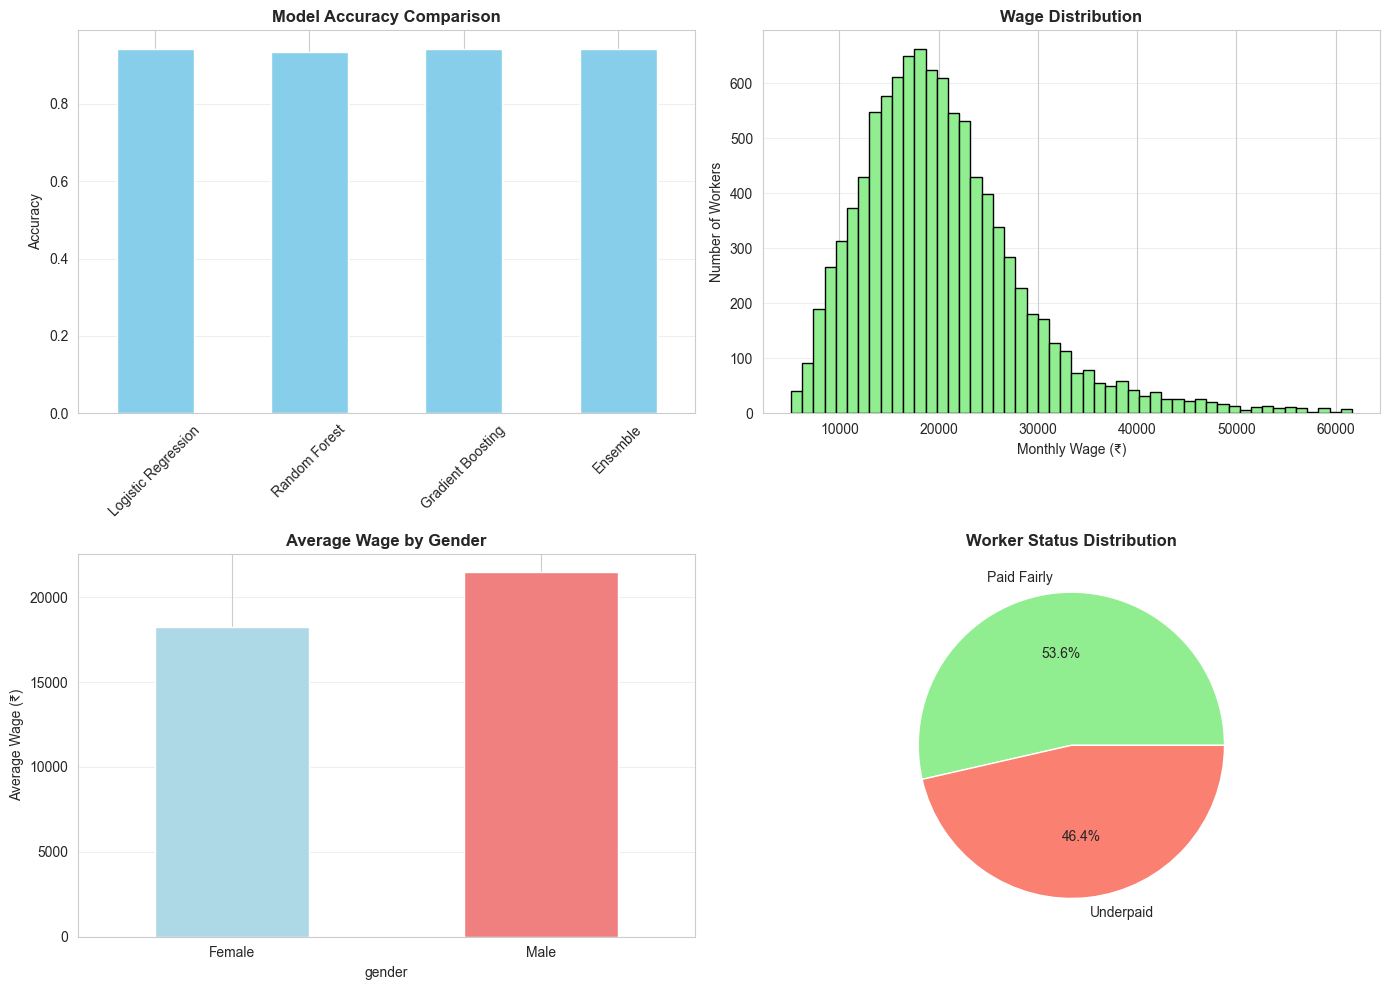

In [54]:
# PART 9: VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Model Comparison
ax1 = axes[0, 0]
results_df['Accuracy'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Wage Distribution
ax2 = axes[0, 1]
df['actual_monthly_wage'].hist(bins=50, ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Wage Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Monthly Wage (₹)')
ax2.set_ylabel('Number of Workers')
ax2.grid(axis='y', alpha=0.3)

# Gender Wage Gap
ax3 = axes[1, 0]
gender_data = df.groupby('gender')['actual_monthly_wage'].mean()
gender_data.plot(kind='bar', ax=ax3, color=['lightblue', 'lightcoral'])
ax3.set_title('Average Wage by Gender', fontsize=12, fontweight='bold')
ax3.set_ylabel('Average Wage (₹)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(axis='y', alpha=0.3)

# Underpaid Distribution
ax4 = axes[1, 1]
underpaid_pct = df['is_underpaid'].value_counts(normalize=True) * 100
ax4.pie(underpaid_pct.values, labels=['Paid Fairly', 'Underpaid'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
ax4.set_title('Worker Status Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/wage_gap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [55]:
# FINAL SUMMARY
print(f"\nBest Model: {best_model_name} ({results_df.loc[best_model_name, 'Accuracy']:.2%} accuracy)")



Best Model: Logistic Regression (94.25% accuracy)
